In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pwd

'/home/naheemadebisi/PhD/snow-analytics/lidar/validating_SNODAS/scripts'

In [5]:
lidar_snotel = pd.read_csv("../data_results/snotelvslidar.csv")
lidar_snotel

,Site,file,SNOTEL (m),Lidar (m),std
0,BS,QSI_0.5M_PCSD_USIDBN_20200218_20200219.tif,1.47,1.49,0.024
1,DC,QSI_0.5M_PCSD_USIDDC_20200219_20200219.tif,1.63,1.68,0.103
2,FR,QSI_0.5M_PCSD_USCOFR_20200211_20200211.tif,1.75,1.77,0.072
3,MC,QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif,1.80,1.86,0.050
4,BS_,QSI_0.5M_PCSD_USIDBN_20210315_20210315.tif,1.55,1.52,0.024
5,CP_,QSI_0.5M_PCSD_USCOCR_20210319_20210319.tif,1.68,1.66,0.073
6,FR_,QSI_0.5M_PCSD_USCOFR_20210319_20210320.tif,1.51,1.54,0.071
7,LC_,QSI_0.5M_PCSD_USUTLC_20210318_20210318.tif,1.83,2.02,0.105
8,MC_,QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif,1.88,1.89,0.038


In [6]:
r = lidar_snotel["SNOTEL (m)"].corr(lidar_snotel["Lidar (m)"])
print("r : {}".format(r))
print("r^2 : {}".format(r*r))

r : 0.9482509277915547
r^2 : 0.8991798220575443


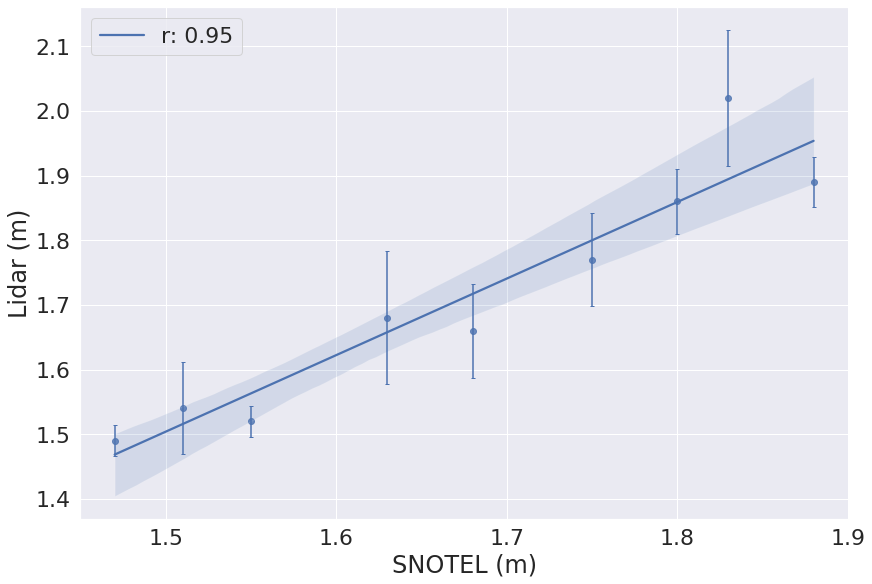

In [10]:
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)
sns.set(font_scale=2)
ax = sns.regplot(x= lidar_snotel["SNOTEL (m)"], y=lidar_snotel["Lidar (m)"])
ax.errorbar(lidar_snotel["SNOTEL (m)"], y=lidar_snotel["Lidar (m)"], yerr=lidar_snotel["std"], fmt='none', capsize=2, zorder=1, color='C0')
plt.legend(labels=["r: {:.2f}".format(lidar_snotel["SNOTEL (m)"].corr(lidar_snotel["Lidar (m)"]))])
plt.show()

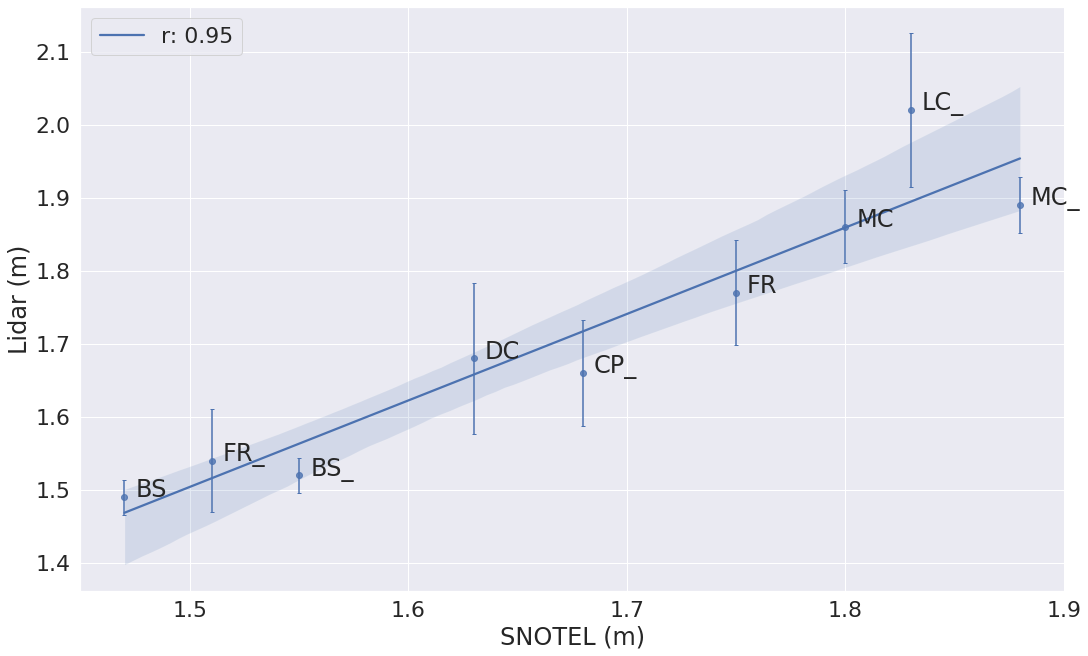

In [11]:
fig, ax = plt.subplots(figsize = (15,9), constrained_layout = True)
sns.set(font_scale=2)
ax = sns.regplot(x= lidar_snotel["SNOTEL (m)"], y=lidar_snotel["Lidar (m)"])
ax.errorbar(lidar_snotel["SNOTEL (m)"], y=lidar_snotel["Lidar (m)"], yerr=lidar_snotel["std"], fmt='none', capsize=2, zorder=1, color='C0')
plt.legend(labels=["r: {:.2f}".format(lidar_snotel["SNOTEL (m)"].corr(lidar_snotel["Lidar (m)"]))])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.005, point['y'], str(point['val']))

label_point(lidar_snotel["SNOTEL (m)"], lidar_snotel["Lidar (m)"], lidar_snotel["Site"], plt.gca()) 

plt.show()